In [ ]:
#Import the pandas libarary
import pandas as pd
#Read the SMS4ML csv file and store in the data frame, "df"
df = pd.read_csv('/content/SMS4ML.csv')
#Display the first 5 rows of the data set.
df.head(5)

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [ ]:
#check number of rows in df
len(df)

5572

In [ ]:
#check if there a any null values in the data set
df.isnull().sum().sum()

0

In [ ]:
#check if there are any blanks in the dataset
blanks = []
for i, label, message, length, punct in df.itertuples():
  if type(message)==str:
    if message.isspace():
      blanks.append(i)

print(len(blanks), 'blanks: ', blanks)

0 blanks:  []


In [ ]:
#Check the number of spam labels and ham labels
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
#split the data set into messages, X, and labels, y
X = df['message']
y = df['label']

#Split data into training and testing sets
#The data is split with 70% trainning and 30% testing using a random state of reproductibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
#Check how many trainning value counts vs testing to ensure about a 70/30 split
y_train.value_counts(), y_test.value_counts()

(ham     3377
 spam     523
 Name: label, dtype: int64,
 ham     1448
 spam     224
 Name: label, dtype: int64)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

#Create a text classification pipeline using Naive Bayes
text_clf_nb = Pipeline([('tfidf', TfidfVectorizer()), #Text vectorization using TF-IDF
                        ('clf', MultinomialNB()),]) #Classifier using Naive Bayes

#Train the text classification pipeline on training data
text_clf_nb.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

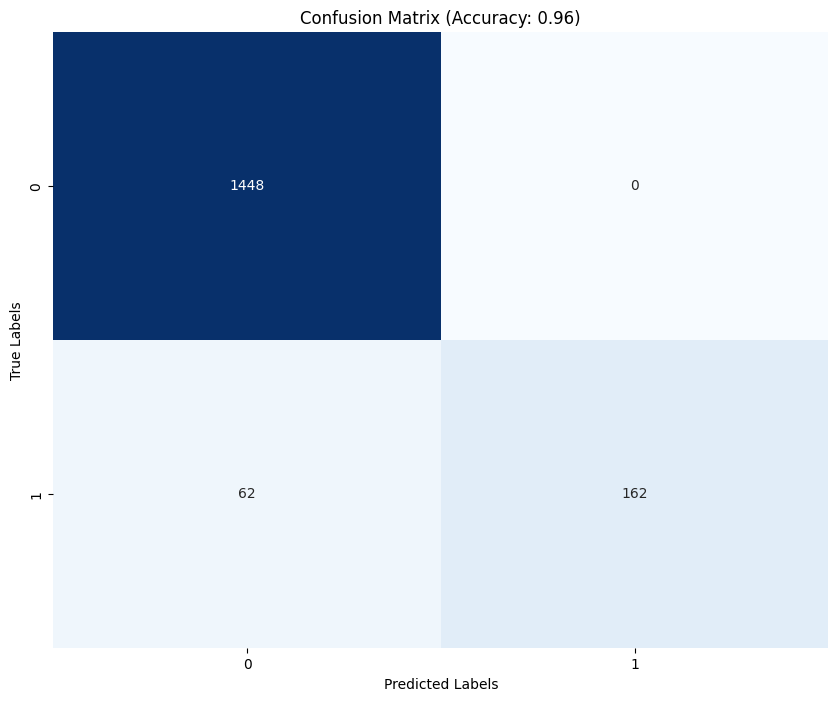

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Generate predictions using naive bayes model
predictions = text_clf_nb.predict(X_test)
# Calculate confusion matrix
confusion_mat = metrics.confusion_matrix(y_test, predictions)
# Calculate the accuracy score
accuracy = accuracy_score(y_test, predictions)
# Create a larger confusion matrix to display
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title(f"Confusion Matrix (Accuracy: {accuracy:.2f})")
# Show the confusion matrix
plt.show()


In [ ]:
#Use the Linear Support Vector to compare results
from sklearn.svm import LinearSVC
#Create a text classification pipline for LSV
text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer()), #Text vectorization using TF-IDF
                        ('clf', LinearSVC()),]) #Classifier for linear support vector
#train the pipeline
text_clf_lsvc.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

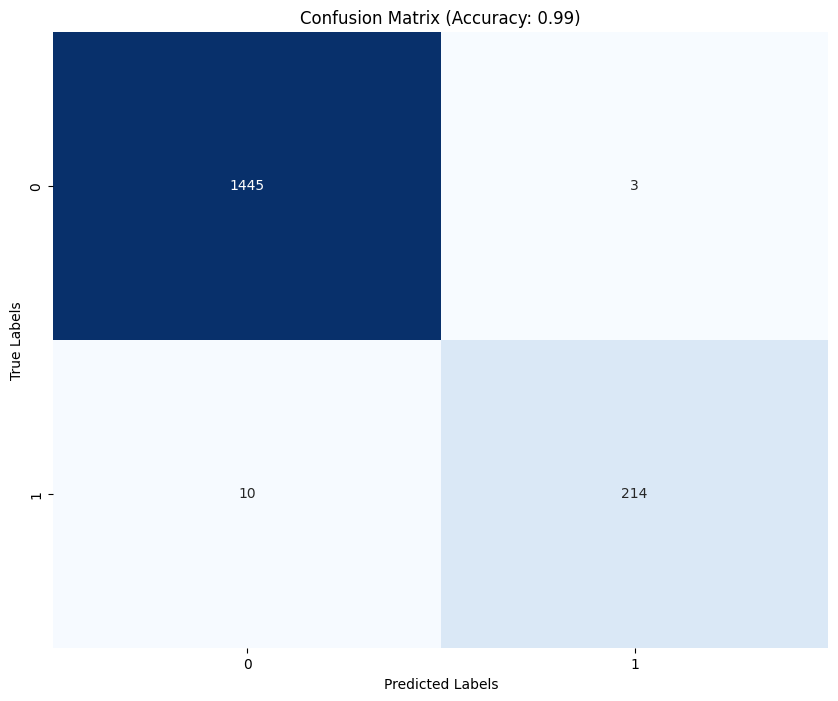

In [ ]:
# Generate predictions using LSV model
predictions_lsvc = text_clf_lsvc.predict(X_test)
# Calculate confusion matrix
confusion_mat_lsvc = confusion_matrix(y_test, predictions_lsvc)
# Calculate the accuracy score
accuracy_lsvc = accuracy_score(y_test, predictions_lsvc)
# Create a larger confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat_lsvc, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title(f"Confusion Matrix (Accuracy: {accuracy_lsvc:.2f})")
# Show the confusion matrix
plt.show()

In [ ]:
#Now take out stopwords to see if I can get a better accuracy
import nltk
nltk.download("stopwords")  # Download NLTK stopwords data once

from nltk.corpus import stopwords  # Import stopwords from NLTK

enstopwords = set(stopwords.words("english"))

# Create a Text Classification Pipeline using Naive Bayes with TF-IDF vectorization and English stopwords exclusion
text_clf_nb = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words="english")),  # TF-IDF with English stopwords exclusion
    ('clf', MultinomialNB()),  # Multinomial Naive Bayes classifier
])

# Fit (train) the Text Classification Pipeline on the training data
text_clf_nb.fit(X_train, y_train)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('clf', MultinomialNB())])

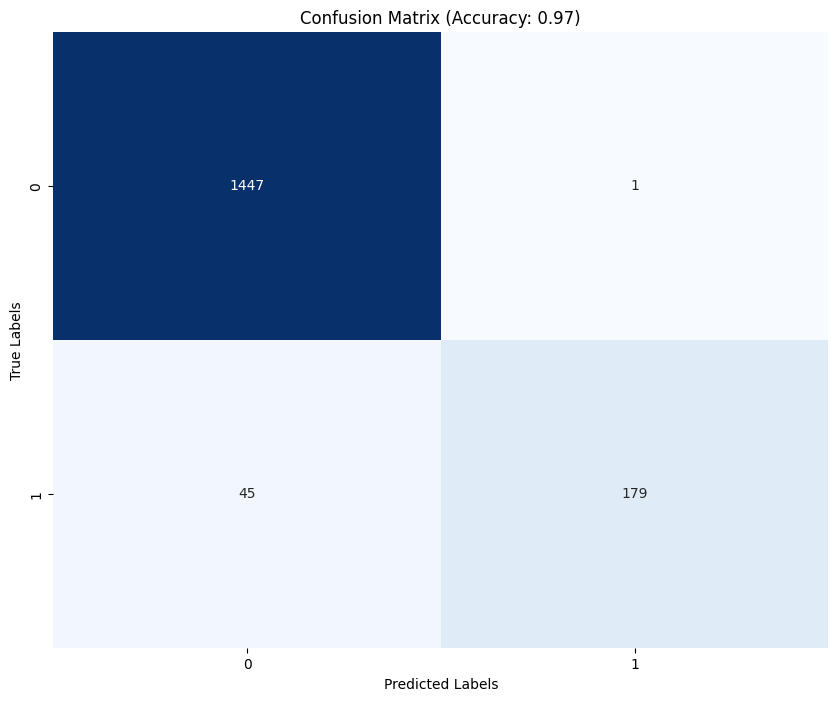

In [ ]:
# Make predictions on the test data using the trained model
predictions_stopwords = text_clf_nb.predict(X_test)
#Calculate the confusion matrix
confusion_mat_stop = confusion_matrix(y_test, predictions_stopwords)
# Calculate the accuracy score
accuracy_stop = accuracy_score(y_test, predictions_stopwords)
# Create a larger confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat_stop, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title(f"Confusion Matrix (Accuracy: {accuracy_stop:.2f})")
# Show the confusion matrix
plt.show()


In [ ]:
#import porter stemmer from NLTK
from nltk.stem import PorterStemmer
#import tokenization
from nltk.tokenize import word_tokenize
# Download the punkt resource from nltk
nltk.download('punkt')
#initalize the stemmer
stemmer = PorterStemmer()

#create a stemmed text function
def stem_text(text):
    #tokenize the imput
    tokens = word_tokenize(text)
    #stem each word imported
    stemmed_words = [stemmer.stem(word) for word in tokens]
    #initalize stop words
    stop_words = set(nltk.corpus.stopwords.words('english'))
    #remove stop words
    filtered_words = [word for word in stemmed_words if word.lower() not in stop_words]
    #join the stemmed words without stopwords back together
    clean_text = ' '.join(filtered_words)
    #returned the stemmed, clean output
    return clean_text

#apply the function to the message column of the dataset
df["message"] = df["message"].apply(stem_text)

#create a new dataset for the stemmed messages without stop words
df.to_csv("stemmed_dataset.csv", index=False)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


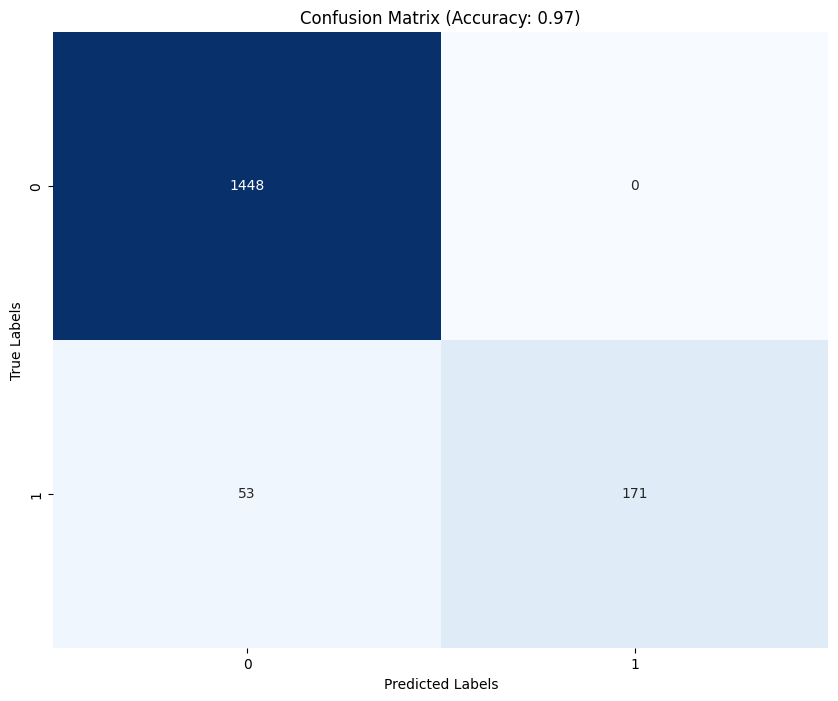

In [ ]:
#import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#import the stemmed dataset
df_stem = pd.read_csv("stemmed_dataset.csv")

X = df_stem['message']
y = df_stem['label']
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
#Create a text classification pipeline
text_clf_nb = Pipeline([('tfidf', TfidfVectorizer()), #Text vectorization using TF-IDF
                        ('clf', MultinomialNB()),]) #Classifier using Naive Bayes
#Train the text classification pipeline
text_clf_nb.fit(X_train, y_train)
# Generate predictions
predictions_stem = text_clf_nb.predict(X_test)
# Calculate confusion matrix
confusion_mat_stem = metrics.confusion_matrix(y_test, predictions_stem)
# Calculate the accuracy score
accuracy_stem = accuracy_score(y_test, predictions_stem)
# Create a larger confusion matrix to display
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat_stem, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title(f"Confusion Matrix (Accuracy: {accuracy_stem:.2f})")
# Show the confusion matrix
plt.show()